In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
# importing data into dataframe from local disk
df = pd.read_csv("/content/drive/MyDrive/Machine learning/Assignment/Assignment 3/AirfoilSelfNoise.csv")
# getting info about data
print(df.info())

cols = ['Frequency', 'Angle of attack', 'Chord length', 'FS velocity','SSD thickness']
df[cols] = df[cols].apply(lambda x: (x - x.mean()) / x.std())
# Spliting data into test and training dataframe
train = df.sample(int(0.7*df.shape[0]))
test = df.drop(train.index)

# Printing info about training and testing data

print("Train data shape",train.shape)
print("Test data shape",test.shape)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Frequency        1503 non-null   int64  
 1   Angle of attack  1503 non-null   float64
 2   Chord length     1503 non-null   float64
 3   FS velocity      1503 non-null   float64
 4   SSD thickness    1503 non-null   float64
 5   SSPL             1503 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 70.6 KB
None
Train data shape (1052, 6)
Test data shape (451, 6)


In [28]:
# Taking x_train and y_train
print(train.columns)
x_train = train[['Frequency', 'Angle of attack', 'Chord length', 'FS velocity','SSD thickness']]
print(x_train.head())
y_train = train['SSPL']
print(x_train.head())
print(y_train)

Index(['Frequency', 'Angle of attack', 'Chord length', 'FS velocity',
       'SSD thickness', 'SSPL'],
      dtype='object')
      Frequency  Angle of attack  Chord length  FS velocity  SSD thickness
1079   0.670443         0.459216     -1.188234     0.297908      -0.517974
961    0.353241         2.182734     -0.916694    -0.723104       1.927275
858   -0.788683         0.746469     -0.916694    -0.723104       0.297175
243   -0.788683        -0.808077      0.984082     1.312498      -0.624291
807   -0.788683         0.273346     -0.916694     0.297908      -0.432794
      Frequency  Angle of attack  Chord length  FS velocity  SSD thickness
1079   0.670443         0.459216     -1.188234     0.297908      -0.517974
961    0.353241         2.182734     -0.916694    -0.723104       1.927275
858   -0.788683         0.746469     -0.916694    -0.723104       0.297175
243   -0.788683        -0.808077      0.984082     1.312498      -0.624291
807   -0.788683         0.273346     -0.916694    

In [29]:
# Taking  and y_train

print(test.columns)
x_test = test[['Frequency', 'Angle of attack', 'Chord length', 'FS velocity','SSD thickness']]
y_test = test['SSPL']
print(x_test.head())

Index(['Frequency', 'Angle of attack', 'Chord length', 'FS velocity',
       'SSD thickness', 'SSPL'],
      dtype='object')
    Frequency  Angle of attack  Chord length  FS velocity  SSD thickness
8    0.670443        -1.146021      1.798701     1.312498      -0.644590
10   1.622046        -1.146021      1.798701     1.312498      -0.644590
14  -0.756963        -1.146021      1.798701     0.297908      -0.631857
18  -0.519062        -1.146021      1.798701     0.297908      -0.631857
21  -0.122560        -1.146021      1.798701     0.297908      -0.631857


In [30]:

# model fn
def gd(x,y):
  loop = 10000
  learning_rate = 0.001
  n= x.shape[0]
  coeff = np.zeros((x.shape[1],1))
  cost = []
  for i in range(loop):
    y_pred = np.dot(x,coeff)
    cost_fn = (1/(2*n)) * np.sum(np.square(y_pred - y))
    coeff_fn = (1/n) * np.dot(x.T,y_pred - y)
    if(i%100==0):
      print(coeff_fn)
    coeff = coeff - coeff_fn*learning_rate
    cost.append(cost_fn)
  return coeff,cost
  


[[-124.92540019]
 [   5.60654667]
 [   0.39273188]
 [   1.8065866 ]
 [  -1.5738648 ]
 [  -0.17035856]]
[[-113.01838273]
 [   4.84376781]
 [   0.63156815]
 [   1.64838796]
 [  -1.44194402]
 [   0.16523647]]
[[-102.24739652]
 [   4.18725898]
 [   0.79717767]
 [   1.52063203]
 [  -1.31973962]
 [   0.41573382]]
[[-92.50386908]
 [  3.62169559]
 [  0.90601721]
 [  1.41601738]
 [ -1.20669832]
 [  0.59860502]]
[[-83.68963614]
 [  3.13406685]
 [  0.97119302]
 [  1.32889835]
 [ -1.10227921]
 [  0.72795181]]
[[-75.71593819]
 [  2.71330821]
 [  1.00311486]
 [  1.25493499]
 [ -1.00595582]
 [  0.81514246]]
[[-68.50251485]
 [  2.34999505]
 [  1.01002481]
 [  1.19081354]
 [ -0.91721788]
 [  0.86932872]]
[[-61.97678729]
 [  2.036087  ]
 [  0.99842477]
 [  1.13402363]
 [ -0.83557289]
 [  0.89786589]]
[[-56.07311993]
 [  1.76471416]
 [  0.97342172]
 [  1.08268109]
 [ -0.76054737]
 [  0.90665395]]
[[-50.73215371]
 [  1.529998  ]
 [  0.93900639]
 [  1.03538741]
 [ -0.69168788]
 [  0.90041473]]
[[-45.900203

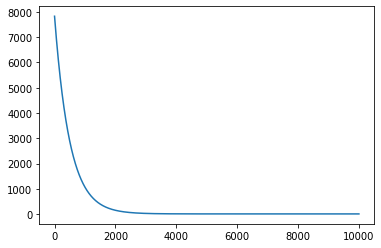

In [31]:
intercept_column = np.ones((x_train.shape[0],1))
x_train1 = np.insert(x_train.values,[0],intercept_column,1)
intercept_column = np.ones((x_test.shape[0],1))
x_test1 = np.insert(x_test.values,[0],intercept_column,1)

y_train1 = y_train.values.reshape(y_train.shape[0],1)
y_test1 = y_test.values.reshape(y_test.shape[0],1)

#calling model fn from here
coeff,cost = gd(x_train1, y_train1)
#print(coeff)
#print(cost[len(cost)-1])
#plotting cost_fn vs iteration
rg=np.arange(0, 10000)
plt.plot(rg, cost)
plt.show()
#predicting y for x_test
y_pred = np.dot(x_test1, coeff) 


In [32]:
# Calculating errors for self_prepared model

from sklearn.metrics import mean_squared_error,mean_absolute_error
MSE = mean_squared_error(y_test1,y_pred)
MAE = mean_absolute_error(y_test1,y_pred)
RMSE = np.sqrt(MSE)
print("mean abslute error",MAE)
print("mean square error",MSE)
print("root mean square error",RMSE)

mean abslute error 3.4674014949921745
mean square error 19.65305428785344
root mean square error 4.433176545982963


In [33]:
# Preparing model using build in function of sklearn

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)
test_predict = model.predict(x_test)

# Calculating errors

from sklearn.metrics import mean_squared_error,mean_absolute_error
MSE = mean_squared_error(y_test,test_predict)
MAE = mean_absolute_error(y_test,test_predict)
RMSE = np.sqrt(MSE)
print("mean abslute error",MAE)
print("mean square error",MSE)
print("root mean square error",RMSE)
print("coeff from sklearn model",model.coef_)
print('slope from sklearn LR model : ', model.intercept_)

mean abslute error 3.464976475144848
mean square error 19.641643756809387
root mean square error 4.4318894116177345
coeff from sklearn model [-3.98815654 -2.43610946 -3.24051106  1.68879464 -1.8502808 ]
slope from sklearn LR model :  124.85771156694956


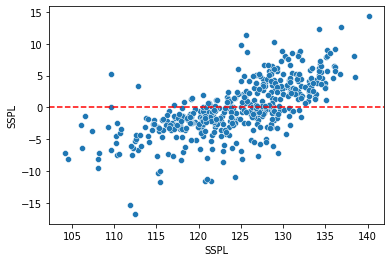

In [34]:
# residual plot

test_residual = y_test - test_predict
sns.scatterplot(x = y_test, y = test_residual)
plt.axhline(y = 0, color = "r", ls ="--")

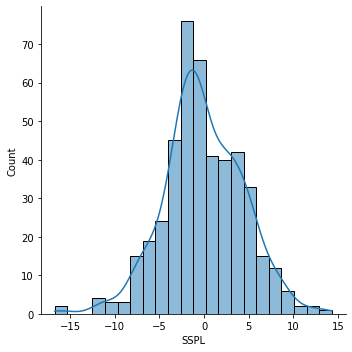

In [35]:
sns.displot(test_residual ,kde="True")

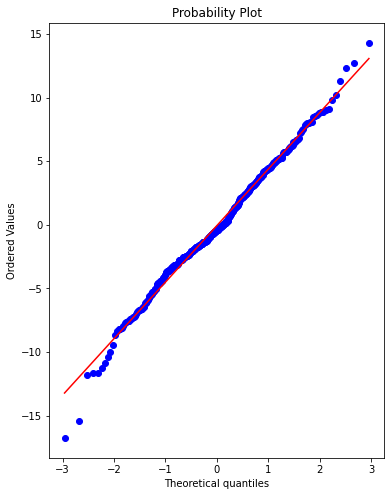

In [36]:
import scipy as sp
fig, ax = plt.subplots(figsize =(6,8))
_ = sp.stats.probplot(test_residual,plot=ax)